In [407]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [410]:
data = pd.read_csv("drive/MyDrive/Updated_Student_Performance.csv")
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({
    'No':0,
    'Yes':1,
})
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,target
0,7,99,1,9,1,91,1
1,4,82,0,4,2,65,0
2,8,51,1,7,2,45,0
3,5,52,1,5,2,36,0
4,7,75,0,8,5,66,0


pada dataset, ditambahkan kolom target yang menunjukkan apakah performance indexnya better atau tidak, dilihat jika performance index >= 70, maka target menjadi 1

In [413]:
X = data.drop(columns='target', axis=1)
y = data['target']

In [414]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91
1,4,82,0,4,2,65
2,8,51,1,7,2,45
3,5,52,1,5,2,36
4,7,75,0,8,5,66
...,...,...,...,...,...,...
9995,1,49,1,4,2,23
9996,7,64,1,8,5,58
9997,6,83,1,8,5,74
9998,9,97,1,7,0,95


In [415]:
y

0       1
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: target, Length: 10000, dtype: int64

Training & Prediction

In [420]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [421]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1470,    0],
       [   0,  530]])

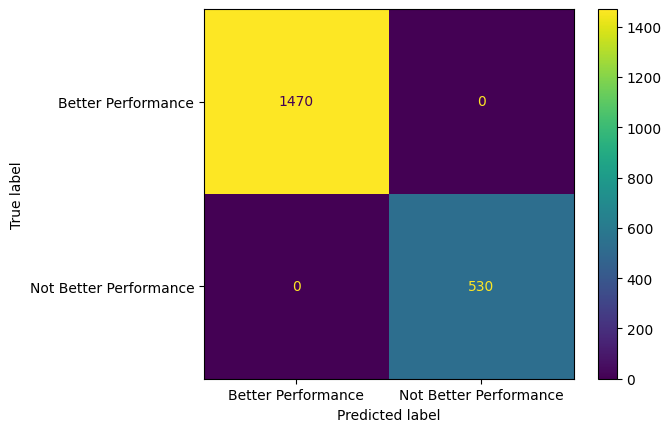

In [424]:
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Better Performance", "Not Better Performance"]).plot()

In [425]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall:    ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:  ", f1_score(y_test, y_pred, average='weighted'))

Accuracy:  1.0
Precision:  1.0
Recall:     1.0
F1 Score:   1.0


KESIMPULAN: